In [26]:
import tensorflow as tf
import numpy as np
import sklearn as sk
from sklearn import datasets, model_selection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# load iris dataset from iris.data file
ds = pd.read_csv('iris.data', header=None)
# convert to pandas dataframe, and give column names (Min, Max, Mean, SD, Class Correlation)
df = pd.DataFrame(ds)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Classes']
    

In [28]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


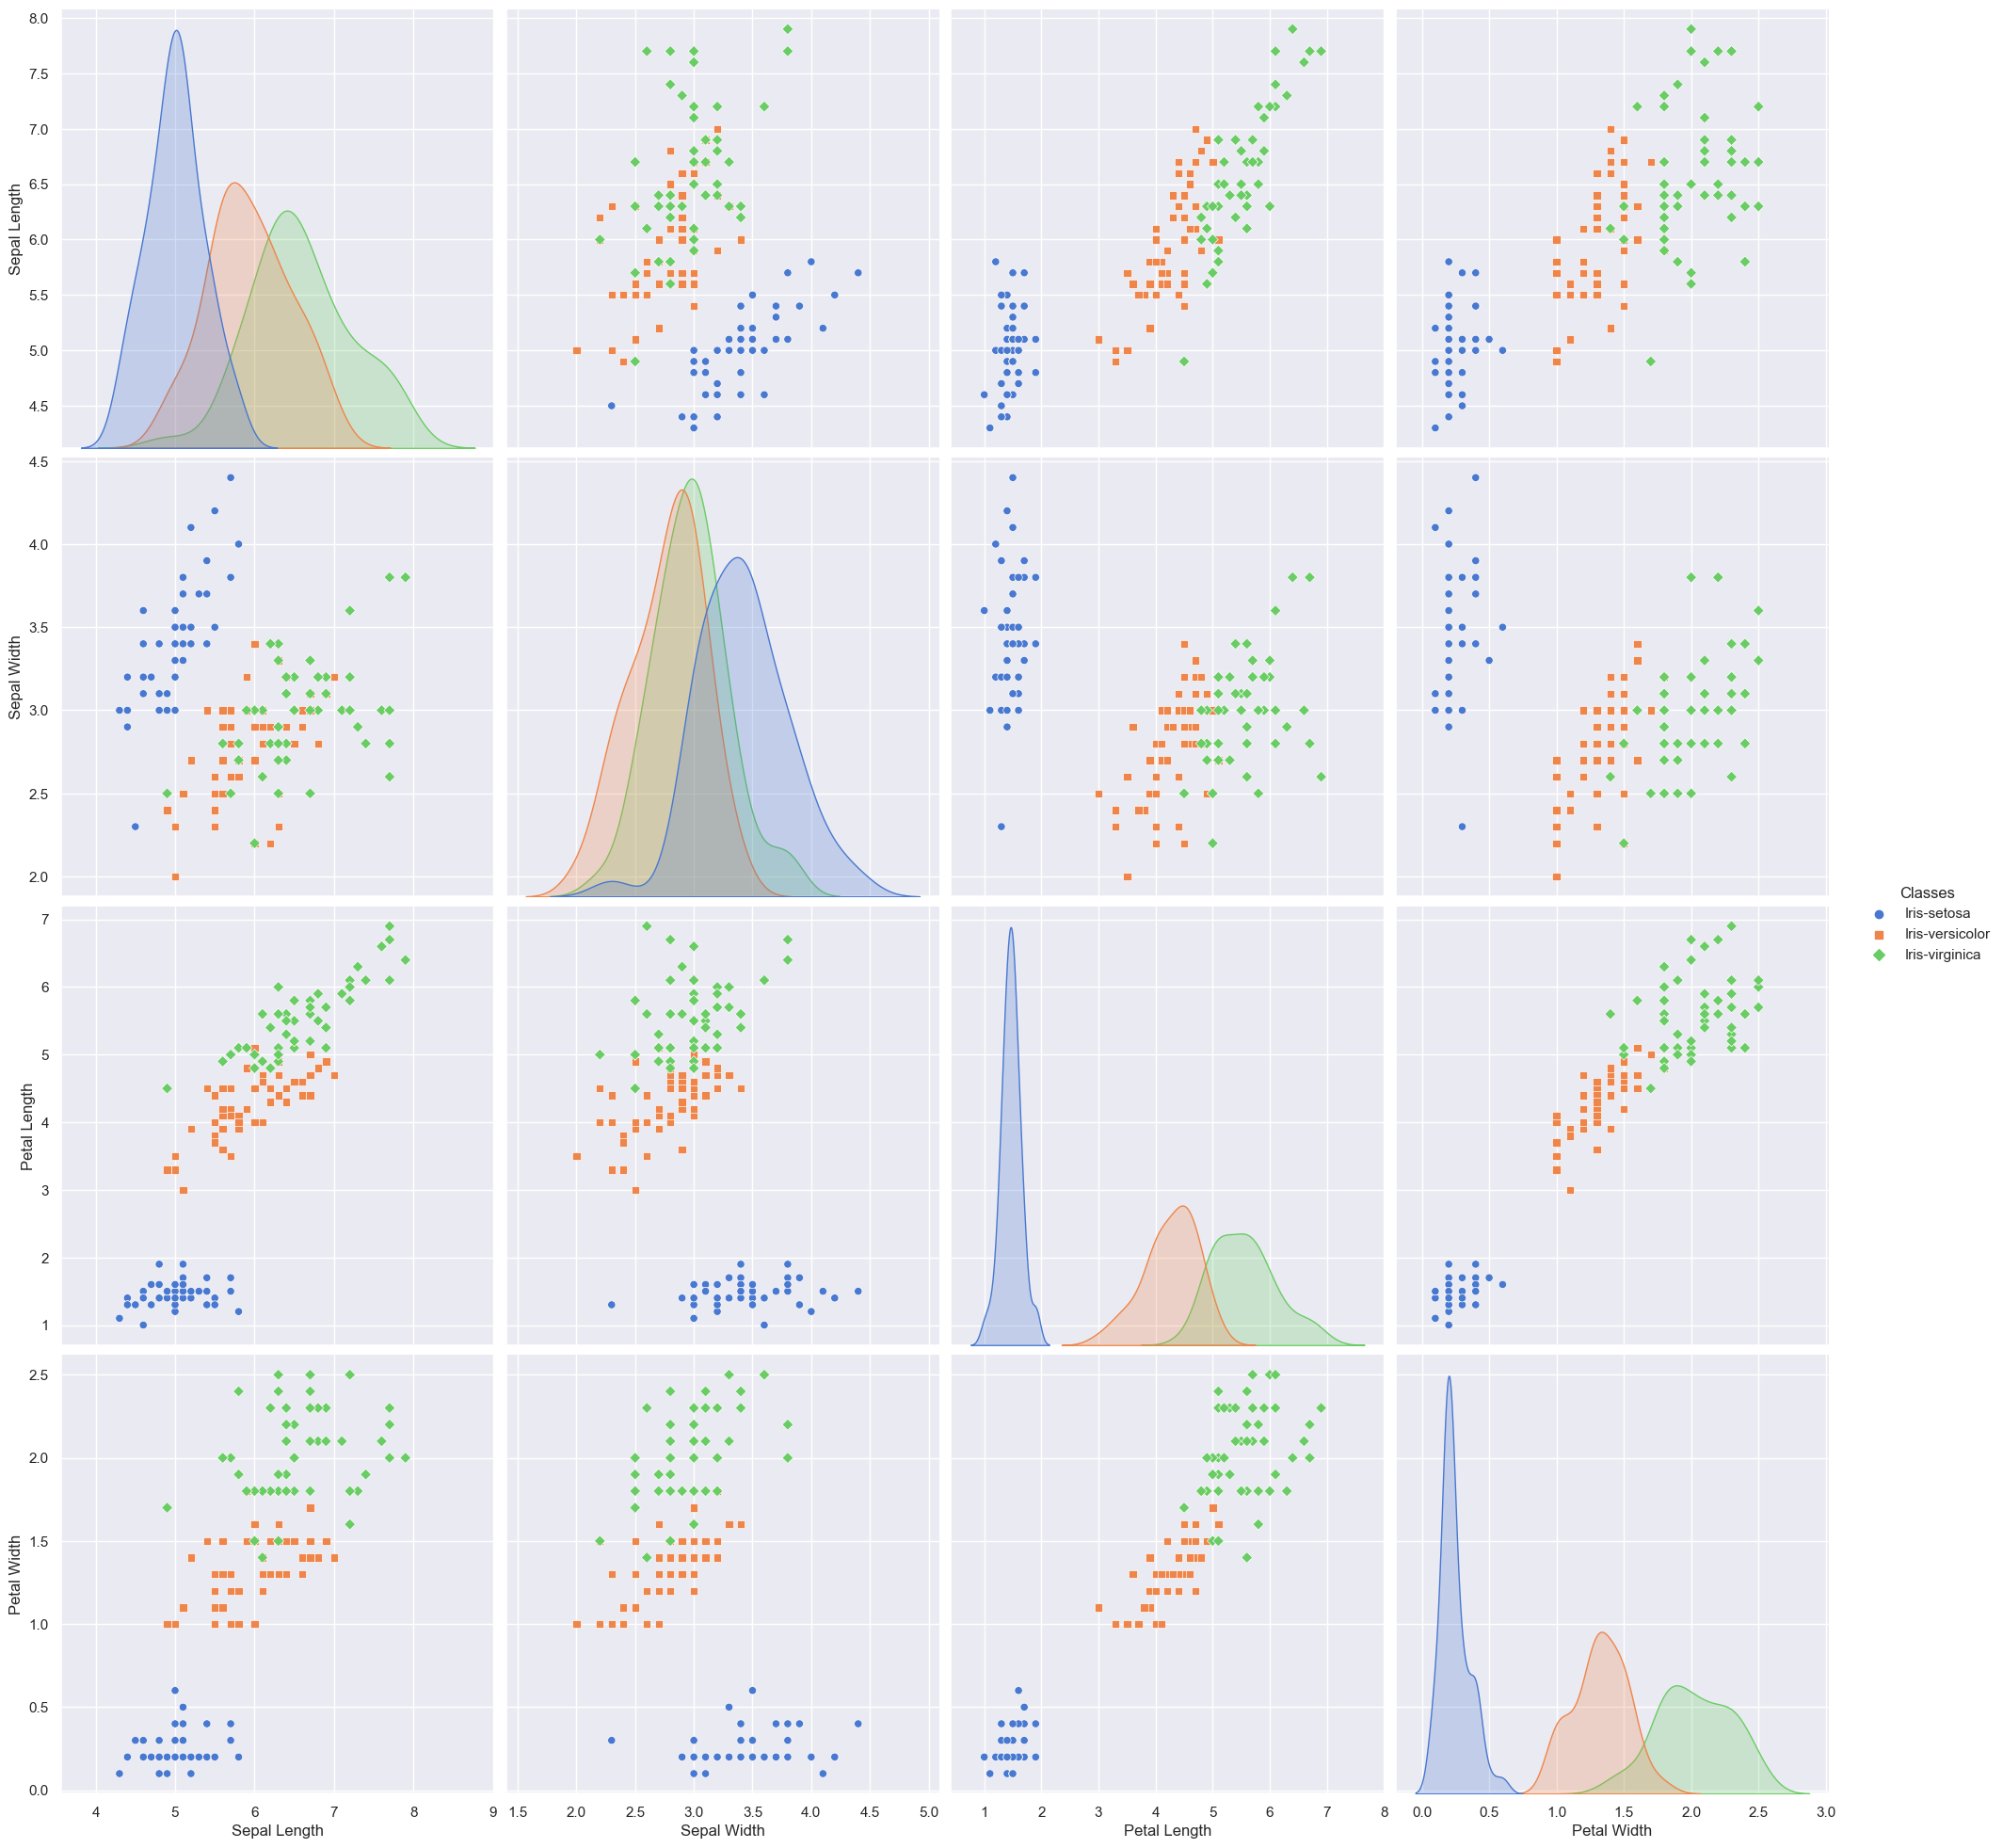

In [30]:
# plot the distribution of each feature with seaborn
a = sns.pairplot(df, hue = 'Classes', palette = "muted", height = 5,
                 vars = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                 kind = 'scatter', markers = ['o', 's', 'D'])


In [31]:
# convert the class labels to one-hot encoding
df['Classes'] = df['Classes'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

x = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y = df['Classes']

In [32]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# create a model with 3 layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=250, validation_split=0.2, verbose=1)

Epoch 1/250


/Users/doeshing/Developer/miniforge3/envs/Py310/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-05 10:40:32.267667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 63ms/step - loss: 1.1516 - accuracy: 0.3646 - val_loss: 1.1285 - val_accuracy: 0.2083
Epoch 2/250
3/3 [==============================] - 0s 20ms/step - loss: 1.1209 - accuracy: 0.3646 - val_loss: 1.1037 - val_accuracy: 0.2083
Epoch 3/250
3/3 [==============================] - 0s 16ms/step - loss: 1.0921 - accuracy: 0.3646 - val_loss: 1.0785 - val_accuracy: 0.2083
Epoch 4/250
3/3 [==============================] - 0s 17ms/step - loss: 1.0662 - accuracy: 0.3854 - val_loss: 1.0573 - val_accuracy: 0.3750
Epoch 5/250
1/3 [=========>....................] - ETA: 0s - loss: 0.9976 - accuracy: 0.4688

2022-11-05 10:40:32.424740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 17ms/step - loss: 1.0418 - accuracy: 0.4896 - val_loss: 1.0367 - val_accuracy: 0.7083
Epoch 6/250
3/3 [==============================] - 0s 17ms/step - loss: 1.0196 - accuracy: 0.6458 - val_loss: 1.0181 - val_accuracy: 0.7083
Epoch 7/250
3/3 [==============================] - 0s 16ms/step - loss: 0.9992 - accuracy: 0.6458 - val_loss: 1.0008 - val_accuracy: 0.7083
Epoch 8/250
3/3 [==============================] - 0s 15ms/step - loss: 0.9800 - accuracy: 0.6458 - val_loss: 0.9850 - val_accuracy: 0.7083
Epoch 9/250
3/3 [==============================] - 0s 16ms/step - loss: 0.9610 - accuracy: 0.6458 - val_loss: 0.9693 - val_accuracy: 0.7083
Epoch 10/250
3/3 [==============================] - 0s 17ms/step - loss: 0.9441 - accuracy: 0.6458 - val_loss: 0.9546 - val_accuracy: 0.7083
Epoch 11/250
3/3 [==============================] - 0s 18ms/step - loss: 0.9263 - accuracy: 0.6458 - val_loss: 0.9404 - val_accuracy: 0.7083
Epoch 12/250
3/3 [============

1/1 [==============================] - 0s 35ms/step - loss: 0.1235 - accuracy: 0.9333
Test accuracy: 0.9333333969116211


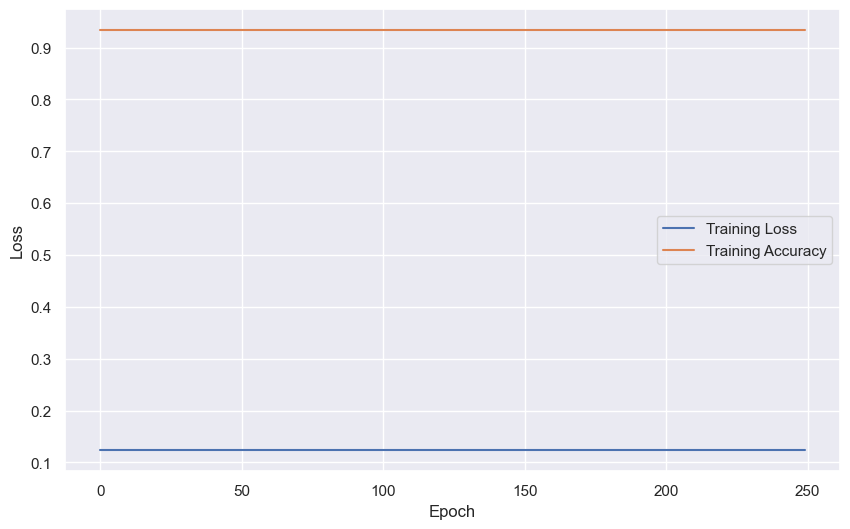

In [34]:
# evaluate the test set and plot with seaborn
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

a = sns.lineplot(x=history.epoch, y=test_loss, label='Training Loss')
a = sns.lineplot(x=history.epoch, y=test_acc, label='Training Accuracy')
a.set(xlabel='Epoch', ylabel='Loss')
a.legend()



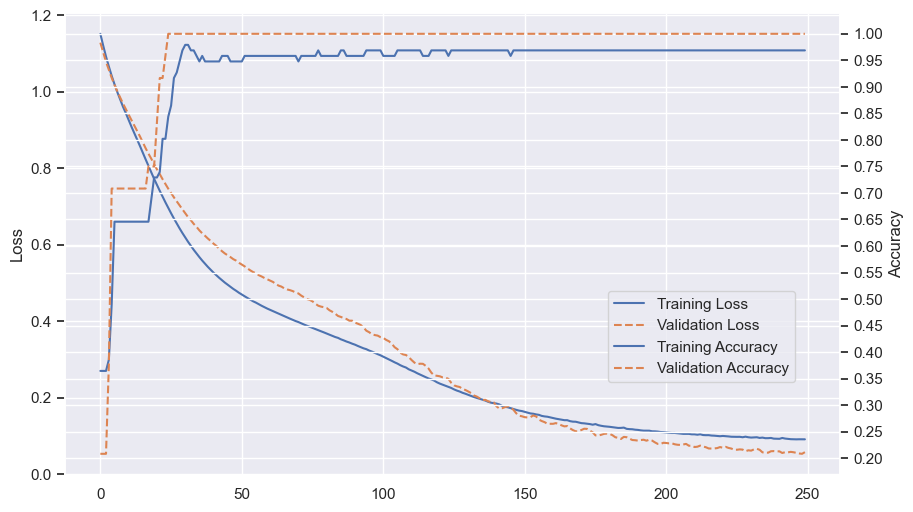

In [41]:
# sns theme
sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4

# plot the history of the training and validation loss with seaborn
a = sns.lineplot(data=history.history['loss'], label='Training Loss')
a = sns.lineplot(data=history.history['val_loss'], label='Validation Loss', linestyle='--')
# set y axis to left side of the plot
a.set_ylabel('Loss')
# hide legend
a.legend_.remove()


# plot the accuracy of the training and validation set with seaborn
b = a.twinx()
b = sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
b = sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
b.set_ylabel('Accuracy')
# set y axis step size to 0.05
b.yaxis.set_major_locator(plt.MultipleLocator(0.05))  # type: ignore

# combine the two plots legend
lines, labels = a.get_legend_handles_labels()
lines2, labels2 = b.get_legend_handles_labels()
b.legend(lines + lines2, labels + labels2, loc=(0.7, 0.2))




In [36]:
# save the model
model.save('iris_model.h5')

In [37]:
# load saved model
load_model = tf.keras.models.load_model('iris_model.h5')

In [38]:
# evaluate the loaded model
load_model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 89ms/step - loss: 0.1235 - accuracy: 0.9333


2022-11-05 10:40:43.844136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.12351267784833908, 0.9333333969116211]